<font size="10" color = "red"> <center> <h1>Jorge Cardona</h1> </center> </font>

<font size="5"> <center> <h1>Imagen tomada de https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif</h1> </center> </font>
![Alt Text](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

In [2]:
# instalar estas extensiones para que se pueda usar variables dentro del markdown
# es mejor instalar estos paquetes usando la terminal, ya que a veces no instalan
# en ocasiones es necesario crear un nuevo notebook para que funcione
#pip install jupyter_contrib_nbextensions
#jupyter contrib nbextension install --user
#jupyter nbextension enable python-markdown/main

In [3]:
# configura el tamano de cada celda al 100% de la pantalla
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# libreria que reune todas las características de un sistema de álgebra computacional 
# https://docs.sympy.org/0.7.2/tutorial.html
import sympy

#importa el valor infinito
from sympy import oo as infinito

# importa la libreria de simbolos, para interpretar las letras como variables en una ecuacion
from sympy import symbols as sb

#Declaramos las letras que se pueden usar para derivar en la funcion
f,w,x,z = sb('f, w x z')

#Utilizamos el método init_printing, para que muestre los resultados como ecuaciones y no como operaciones matematicas
sympy.init_printing(use_unicode=True)

In [5]:
# Nombre del método que se va a realizar
metodo = "Método Númerico Newton Raphson"

# declara la ecuacion que será la base del ejercicio
y_original = (2*x**5) - (3*x**4) + (4*x**3) - (5*x**2) + (6*x) + 7 
y_derivada = y_original.diff(x)
y1 = y_original
y2 = y_derivada

# listas donde se van a guardar los valores de la grafica
m = []
n = []

# convierte la ecuacion a notacion latex, para mostrar en el gráfico
ecuacion_original = "${" + str(y_original).replace("**","^").replace("*","") + "}$"
ecuacion_derivada = "${" + str(y_derivada).replace("**","^").replace("*","") + "}$"

<font size="10"> <center> <h1>{{metodo}}</h1> </center> </font>
<font size="10">$$x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$$</font>
<font size="5"> <center> <h1>Función que se va a evaluar</h1> </center> </font>


<font size="10"><center> $y = $ {{ecuacion_original}}</center></font>
<font size="5"> <center> <h1>derivada de la función a evaluar</h1> </center> </font>
<font size="10"><center> $y' = $ {{ecuacion_derivada}}</center></font>

<font size="5"> <center> <h1>Función en notación matemática</h1> </center> </font>
<font size="10"><center> $f(x) = $ {{ecuacion_original}}</center></font>
<font size="5"> <center> <h1>Función igualada a cero, para encontrar su aproximación</h1> </center> </font>
<font size="10"><center> $f(x) = 0 $</center></font>

In [18]:
# comienza a iterar en el rango que se quiere gráficar, cálcula la función para cada valor
# guarda los valores de la funcion evaluada entre el rango
def definir_valores_grafica(k,l,y1):
    while (k > l):

        # guarda los valores que se van a gráfica en el eje x
        m.append(round(k,2))
        # guarda los valores que se van a gráfica en el eje y
        n.append(round(y1.subs(x,k),2))
        # decremento de la variable que controla el loop, para garantizar que termine
        k -= 0.1
    # devuelve el resultado obtenido
    return m,n

In [6]:
def genera_valor_inicio(rango,divisiones_promedio):
    
    # asigna el numero de veces que se va a dividir la diferencia entre cero y valor del limite superior
    if(rango <= 100):
        divisiones_promedio *= 2
    elif(rango <= 1000):
        divisiones_promedio *= 20
    elif(rango <= 10000):
        divisiones_promedio *= 200
    elif(rango <= 100000):
        divisiones_promedio *= 2000
    elif(rango <= 1000000):
        divisiones_promedio *= 20000         
    else:
        divisiones_promedio *= 200000  
        
    return rango / divisiones_promedio

In [7]:
def valor_inicio(conjunto_prueba,y1,contador_inferior,contador_superior,rango):
    
    for i in range(len(conjunto_prueba)):
        
        #calcula el valor de la funcion y lo asigna a la variable
        calculo_funcion = y1.subs(x,conjunto_prueba[i])

        # si el calculo de la funcion es cero, ya encontro el valor para resolver la ecuacion
        if(calculo_funcion == 0):
            #asigna el valor donde hace que la ecuacion sea cero
            rango = calculo_funcion
            #finaliza el ciclo, porque ya encontro el valor que satisface la ecuacion
            break
        else:
            # comienza a crear una lista con los valores calculados de la funcion
            valores.append(calculo_funcion)

            # la funcion calculada tiene valores negativos y va a dar el limite inferior del rango
            if(calculo_funcion < 0):

                # verifica que no exista un valor asignado anteriormente como limite inferior
                if(contador_inferior < 1):
                    # asigna el valor del limite inferior del rango
                    rango[0] = calculo_funcion

                    #asegura de que no se vuelva a reescribir el valor
                    contador_inferior += 1

                # verifica que el valor actual sea mayor que el valor anterior, y el valor actual sea mayor al valor del rango en la posicion cero
                # y si es asi, actualiza el valor como un nuevo limite inferior
                elif((valores[i] > valores[i -1]) and (valores[i] > rango[0])):

                    # asigna el valor del limite inferior del rango
                    rango[0] = calculo_funcion

            # la funcion calculada en ese valor tiene valor positivo  
            else:
                # verifica que no exista un valor asignado anteriormente como limite inferior
                if(contador_superior < 1):
                    # asigna el valor del limite inferior del rango
                    rango[1] = calculo_funcion

                    #asegura de que no se vuelva a reescribir el valor
                    contador_superior += 1

                # verifica que el valor actual sea menor que el valor anterior, y el valor actual sea menor al valor del rango en la posicion uno
                # y si es asi, actualiza el valor como un nuevo limite superior
                elif((valores[i] < valores[i -1]) and (valores[i] < rango[0])):

                    # asigna el valor del limite superior del rango
                    rango[1] = calculo_funcion   
        
        # verifica si la lista tenga tamano uno
    # si es asi, ya tiene el valor para resolver la ecuacion
    if(len(rango) == 1):
        # asigna el valor que resuleve la ecuacion
        x0 = rango
    # realiza un promedio entre los valores del rango encontrado y se elige como punto de partida para el inicio de la aproximacion
    else:
        # el rango no tenia numeros negativos
        if(rango[0] == 0):
            x0 = rango[1] / divisiones_promedio
        # el rango no tenia valores positivos
        elif(rango[1] == 0):
            x0 = rango[0] / divisiones_promedio
            
        elif(rango[0] == float('Inf')):
            x0 = genera_valor_inicio(rango[1],divisiones_promedio)          
                        
        elif(rango[1] == float('-Inf')):
            x0 = genera_valor_inicio(rango[0],divisiones_promedio)
            
        # si el valor del rango[0] es menor que el valor del rango[1]   
        elif( abs(0 - rango[0]) < abs(0 - rango[1]) ):

            # saco la raiz cuadrada del primer valor y la raiz cubica del segundo valor
            # saco el promedio de los valores y los asigno a xo, con 4 cifras significativas
            x0 = round(((-abs(rango[0])**(1/raiz_valor_menor) + abs(rango[1])**(1/raiz_valor_mayor)) / 2),4)
            
        elif( abs(0 - rango[1]) < abs(0 - rango[0]) ):
            # saco la raiz cuadrada del segundo valor y la raiz cubica del primer valor
            # saco el promedio de los valores y los asigno a xo, con 4 cifras significativas
            x0 = round(((-abs(rango[0])**(1/raiz_valor_mayor) + abs(rango[1])**(1/raiz_valor_menor)) / 2),4)

        else:
            x0 = 0   
               
    return x0

In [8]:
def calculo_aproximacion(x0,y1,y2):

    # calcula la funcion con el valor asignado como valor de inicio para la aproximacion
    w = y1.subs(x,x0)

    # compara el valor de la funcion, para determinar el valor de aproximacion del calculo de la sensibilidad a realizar
    if((w < 0) or (w > 0)):

       # asigna la sensibilidad declarada
        aproximacion = 10**(-sensibilidad_ceros)
    # la funcion encontro un valor que daba la solcuion exacta
    else:
       # como se sabe que la solucion es exacta se aproxima directamente a cero
        aproximacion = 0

    # solo se calcula si la aproximacion es diferente de cero
    # ya que si la aproximacion es cero, es porque habia un valor que resolvia la ecuacion
    if(aproximacion != 0):
        # inicia el bucle de comparacacion para hallar el valor que satisface la aproximacion deseada de la funcion
        while (abs(w) > aproximacion):  

            # guarda las coordenadas que se van a usar en la grafica y ver como varia las aproximaciones
            coordenadas_x.append(x0)
            coordenadas_y.append(w)

            #calcula las funciones con el valor de la aproximacion
            z1 = y1.subs(x,x0)
            z2 = y2.subs(x,x0)
            # define la funcion del metodo newton raphson
            x1 = x0 - (z1/z2)

            # guarda el valor de la aproximacion
            x0 = x1.subs(x,x0)

            # recalcula w, para compararlo con el valor de sensibilidad deseado y asi hallar el valor que satisfaga la funcion calculada
            w = y1.subs(x,x0)

    # retorna los valores de la solucion de la aproximacion, primero el valor con que se hace la aproximacion, 
    # y luego el resultado de evaluar la ecuacion con ese valor            
    return x0, w

In [9]:
import numpy as np

# valor del rango donde se evaluaran los valores de la ecuacion
limite   = 10
# valor que incrementa entre cada numero generado para evaluar la ecuacion
intervalo = 0.1

# variable que contiene el intervalo donde estan los valores que permiten definir el valor que aproximar la ecuacion a cero
# despues seran reescritos para tener un intervalo mas cercano de inicio
# otra manera de declarar el valor infinito
rango = [float('-Inf'),float('Inf')]

# variable que contendra los valores con los cuales se eveluara la ecuacion
conjunto_prueba  = []

#estructura repetitiva tipo for, que crea una lista de valores para evaluar la ecuacion
for i in np.arange(-limite, limite, intervalo):
    conjunto_prueba.append(round(i,1))           
    
# variable que contendra los valores de la ecuacion evaluada
valores = []

# coordenadas para graficar y ver como se comporta la aproximacion
coordenadas_x = []
coordenadas_y = []

# variable de control para asegurar el primer valor del intervalo inferior, superior 
contador_inferior = 0
contador_superior = 0

# variable utilizada como sensibilidad, cuando no existen valores positivos o negativos en el rango
# es el numero de veces en que quiero dividir el valor entre cero y el valor positivo o negativo
# para iniciar como valor base para la aproximacion del metodo
divisiones_promedio = 10

# define la cantidad de ceros con que se quiere con precision la aproximacion
sensibilidad_ceros  = 10

# valores asignados para las potencias de las raices que se quieren calcular
# para sacar el promedio de entre los valores del intervalo, y usarlo como punto de inicio para la aproximacion
raiz_valor_menor = 2
raiz_valor_mayor = 3

In [10]:
# calcula el valor con que se va a iniciar la evaluacion del metodo
x0 = valor_inicio(conjunto_prueba,y1,contador_inferior,contador_superior,rango)

In [11]:
# guarda la informacion con que se soluciono la ecuacion
resultado = calculo_aproximacion(x0,y1,y2)
resultado

In [12]:
# define el intervalo en que se va a evaluar la funci+on para construir la gráfica
# utilizo el operador ternario para quedar con el numero que es mayor en valor absoluto
k = abs(rango[0]) if (abs(rango[0]) > abs(rango[1])) else abs(rango[1])
l = -k

puntos_grafica = definir_valores_grafica(k,l,y1)

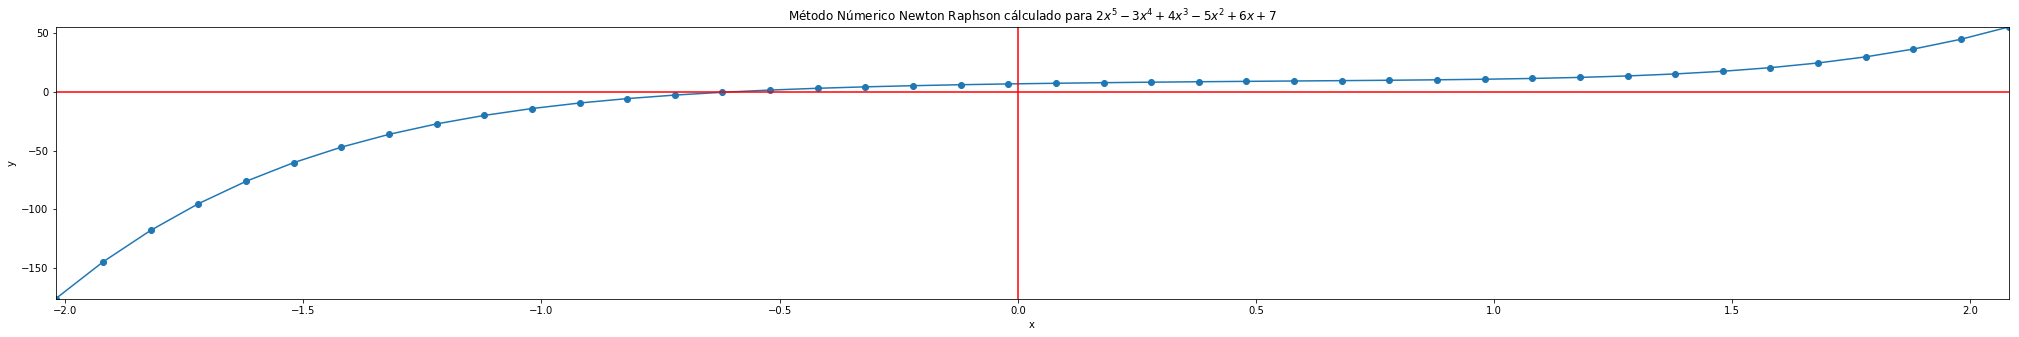

In [17]:
# importar el módulo pyplot
import matplotlib.pyplot as plt

# define el tamaño de la figura
plt.figure(figsize=(35,5))
# almacena los valores a mostrar en la figura
# pinta los puntos con el simbolo asignado en el marker
plt.plot(m,n, marker ="o")
# define la leyendad del eje x
plt.xlabel('x')
# define la leyendad del eje y
plt.ylabel('y')
# define el nombre del gráfico
plt.title(metodo + " cálculado para " + ecuacion_original)
# muestra las lineas del eje X y el eje Y
plt.axhline(y=0, color='red')
plt.axvline(x=0, color='red')

# define la escala de cada eje del gráfico
plt.xlim(min(m),max(m))
plt.ylim(min(n),max(n))

# muestra la figura
plt.show()